In [ ]:
import pandas as pd
import re
from sqlalchemy import create_engine

# Database connection setup
db_config = {
    'host': 'localhost',
    'database': 'postgres',
    'user': 'postgres',
    'password': 'kaviyam123',
    'port': '5432'
}
connection_string = f"postgresql://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['database']}"
engine = create_engine(connection_string)

# Step 1: Load data from PostgreSQL
query = 'SELECT * FROM "overall_policy_level_data_EF";'
data = pd.read_sql(query, con=engine)

print(data.columns.tolist())

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fill missing values for both categorical and numerical columns
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].fillna('missing')
    else:
        data[column] = data[column].fillna(0)

# Identify date columns by checking for columns that could represent dates
date_columns = [col for col in data.columns if 'date' in col.lower()]
for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')

# Extract year, month, and day as separate features for all identified date columns
new_date_cols = {}
for col in date_columns:
    new_date_cols[f'{col}_YEAR'] = data[col].dt.year.fillna(0).astype(int)
    new_date_cols[f'{col}_MONTH'] = data[col].dt.month.fillna(0).astype(int)
    new_date_cols[f'{col}_DAY'] = data[col].dt.day.fillna(0).astype(int)

# Use pd.concat to add these new columns efficiently
data = pd.concat([data, pd.DataFrame(new_date_cols)], axis=1)

# Drop the original date columns after extracting year, month, and day
data = data.drop(date_columns, axis=1)

# Label encode categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    # Ensure all values in the column are strings before encoding
    data[col] = data[col].astype(str)
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Standardize the data (numerical columns only)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop('Policy Status', axis=1, errors='ignore'))  

# Perform PCA without specifying n_components to visualize explained variance
pca = PCA()
pca.fit(data_scaled)

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [ ]:
# Choose a specific number of principal components based on the explained variance plot
pca = PCA(n_components=20)  # Adjust the number based on desired variance retention
principal_components = pca.fit_transform(data_scaled)

# Convert the PCA result back into a DataFrame for further analysis
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, 21)])
pca_df['Policy Status'] = data['Policy Status'].values  # Include the target column for reference

# Save the PCA results to CSV if needed
pca_df.to_csv('pca_result_reduced (up_selected) 20.csv', index=False)

# Calculate the sum of the absolute contributions of each feature across all components
original_feature_names = data.columns.drop('Policy Status')  # Exclude 'Status' from feature names
pca_components = pd.DataFrame(pca.components_, columns=original_feature_names)
feature_importance = pca_components.abs().sum(axis=0)

# Convert the feature importance to a DataFrame
feature_importance_df = pd.DataFrame(feature_importance, columns=['Total Contribution'])

# Sort features by their total contribution in descending order
sorted_feature_importance = feature_importance_df.sort_values(by='Total Contribution', ascending=False)

# Save the summed absolute contributions to a CSV file
sorted_feature_importance.to_csv('pca_feature_importance_summed (up_selected) 20.csv', index=True)

# Print the top 10 contributing features
print("Top 10 Contributing Features:\n", sorted_feature_importance.head(10))

In [ ]:
# Choose a specific number of principal components based on the explained variance plot
pca = PCA(n_components=25)  # Adjust the number based on desired variance retention
principal_components = pca.fit_transform(data_scaled)

# Convert the PCA result back into a DataFrame for further analysis
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, 26)])
pca_df['Policy Status'] = data['Policy Status'].values  # Include the target column for reference

# Save the PCA results to CSV if needed
pca_df.to_csv('pca_result_reduced (up_selected) 25.csv', index=False)

# Calculate the sum of the absolute contributions of each feature across all components
original_feature_names = data.columns.drop('Policy Status')  # Exclude 'Status' from feature names
pca_components = pd.DataFrame(pca.components_, columns=original_feature_names)
feature_importance = pca_components.abs().sum(axis=0)

# Convert the feature importance to a DataFrame
feature_importance_df = pd.DataFrame(feature_importance, columns=['Total Contribution'])

# Sort features by their total contribution in descending order
sorted_feature_importance = feature_importance_df.sort_values(by='Total Contribution', ascending=False)

# Save the summed absolute contributions to a CSV file
sorted_feature_importance.to_csv('pca_feature_importance_summed (up_selected) 25.csv', index=True)

# Print the top 10 contributing features
print("Top 10 Contributing Features:\n", sorted_feature_importance.head(10))

In [ ]:
# Choose a specific number of principal components based on the explained variance plot
pca = PCA(n_components=30)  # Adjust the number based on desired variance retention
principal_components = pca.fit_transform(data_scaled)

# Convert the PCA result back into a DataFrame for further analysis
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, 31)])
pca_df['Policy Status'] = data['Policy Status'].values  # Include the target column for reference

# Save the PCA results to CSV if needed
pca_df.to_csv('pca_result_reduced (up_selected) 30.csv', index=False)

# Calculate the sum of the absolute contributions of each feature across all components
original_feature_names = data.columns.drop('Policy Status')  # Exclude 'Status' from feature names
pca_components = pd.DataFrame(pca.components_, columns=original_feature_names)
feature_importance = pca_components.abs().sum(axis=0)

# Convert the feature importance to a DataFrame
feature_importance_df = pd.DataFrame(feature_importance, columns=['Total Contribution'])

# Sort features by their total contribution in descending order
sorted_feature_importance = feature_importance_df.sort_values(by='Total Contribution', ascending=False)

# Save the summed absolute contributions to a CSV file
sorted_feature_importance.to_csv('pca_feature_importance_summed (up_selected) 30.csv', index=True)

# Print the top 10 contributing features
print("Top 10 Contributing Features:\n", sorted_feature_importance.head(10))

In [ ]:
['Policy Number', 'Policy No', 'Renewal Type', 'Product name', 'Product name  2', 'biztype', 'Policy End Date', 'Insured name', 
 'Renewal Notice generation date', 'Policy Start Date', 'Renewal Policy Start date', 'Reg no', 'age', 'Reg Year Bucket 2', 
 'enginenumber', 'CHASSIS NUMBER', 'MANUFACTURER/Make', 'model', 'variant', 'Fuel Type', 'RTO Location', 'Vehicle IDV', 
 'Claim in last year', 'Last Year NCB', 'Renewal NCB', 'NCB Amount', 'OD Prem Post NCB', 'Premium After Discount', 'Nil Depreciation', 
 'Passenger Assist', 'Consumable Cover', 'Engine Safe Cover', 'Road Side Assistance', 'Key Loss', 'Total Add-on with GST', 
 'Removing GST  in Add-on', 'Before GST Add-on GWP', 'Total OD Premium', 'Total TP Premium', 'Premium Before Applicable Tax', 
 'gst', 'Total Premium Payable', 'Premium Payable without NCB', 'NCB % Previous Year', 'Vehicle Segment', 'New Branch Name', 
 'New Vertical', 'Zone 3', 'state3', 'Hyundai Discount Status', 'OEM Discount Category', 'Applicable Discount with NCB', 
 'Applicable Discount without NCB', 'Discount Category  with NCB', 'Add on Eligibilty (5th & 6th Renewals With NCB)', 'Month', 
 'New Branch Name  2', 'Invited Premium', 'Renewed  Premium', 'decline', 'OEM Category', 'Tie Up', 'Zone 2', 'state2', 'booked', 
 'Booked Date', 'Type', 'null_count', 'Match', 'Cleaned_Insured name', 'CustomerID_Base', 'CustomerID', 'Policy Status', 
 'Policy Tenure Month', 'Policy Tenure', 'Start Year', 'End Year', 'Cumulative Tenure (Months)', 'Tenure Decimal', 'Customer Tenure', 
 'FirstPolicyYear', 'New_Customer_ID', 'New Customers', 'Churn Label', 'Renewal Rate Status']


In [ ]:
'Policy No',  'Renewal Type', 'Product name', 'Product name  2', 'biztype', 'Policy End Date', 'Policy Start Date', 'Reg no', 'age', 
'MANUFACTURER/Make', 'model', 'variant', 'Fuel Type', 'RTO Location', 'Before GST Add-on GWP',  'Total OD Premium', 'Total TP Premium',
'gst', 'Total Premium Payable', 'NCB % Previous Year', 'Vehicle Segment', 'Applicable Discount with NCB', 'New Branch Name  2', 'decline',
'Tie Up', 'Zone 2', 'state2', 'Cleaned_Insured name', 'CustomerID', 'Policy Status', 'Policy Tenure', 'Customer Tenure', 'New Customers', 'Churn Label', 
'Renewal Rate Status', 'Claim in last year', 'Number of Claims'

In [4]:
import pandas as pd
import re
from sqlalchemy import create_engine

# Database connection setup
db_config = {
    'host': 'localhost',
    'database': 'postgres',
    'user': 'postgres',
    'password': 'kaviyam123',
    'port': '5432'
}
connection_string = f"postgresql://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['database']}"
engine = create_engine(connection_string)

# Step 1: Load data from PostgreSQL
query = 'SELECT * FROM "overall_policy_level_data_EF";'
data = pd.read_sql(query, con=engine)

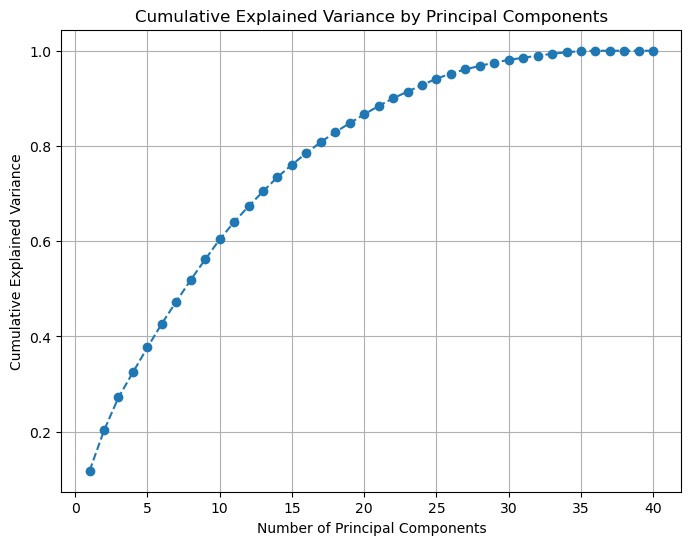

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

selected_columns = ['Policy No',  'Renewal Type', 'Product name ', 'Product name  2', 'biztype', 'Policy End Date', 'Policy Start Date', 'Reg no ', 'age', 
                    'MANUFACTURER/Make', 'model', 'variant', 'Fuel Type', 'RTO Location ', 'Before GST Add-on GWP',  'Total OD Premium', 'Total TP Premium',
                    'gst', 'Total Premium Payable ', 'NCB % Previous Year', 'Vehicle Segment', 'Applicable Discount with NCB', 'New Branch Name  2', 'decline',
                    'Tie Up', 'Zone 2', 'state2', 'Cleaned_Insured name', 'CustomerID', 'Policy Status', 'Policy Tenure', 'Customer Tenure', 'New Customers', 
                    'Churn Label', 'Renewal Rate Status', 'Claim in last year', 'Number of Claims']

data = data[selected_columns]

# Fill missing values for both categorical and numerical columns
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].fillna('missing')
    else:
        data[column] = data[column].fillna(0)

# Convert necessary date columns to datetime format
date_columns = ['Policy Start Date', 'Policy End Date']
for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')

# Extract year, month, and day as separate features for all date columns
new_date_cols = {}
for col in date_columns:
    new_date_cols[f'{col}_YEAR'] = data[col].dt.year.fillna(0).astype(int)
    new_date_cols[f'{col}_MONTH'] = data[col].dt.month.fillna(0).astype(int)
    new_date_cols[f'{col}_DAY'] = data[col].dt.day.fillna(0).astype(int)

# Use pd.concat to add these new columns efficiently
data = pd.concat([data, pd.DataFrame(new_date_cols)], axis=1)

# Drop the original date columns after extracting year, month, and day
data = data.drop(date_columns, axis=1)


# Label encode categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    # Ensure all values in the column are strings before encoding
    data[col] = data[col].astype(str)
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Standardize the data (numerical columns only)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop('Policy Status', axis=1, errors='ignore'))  

# Perform PCA without specifying n_components to visualize explained variance
pca = PCA()
pca.fit(data_scaled)

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [6]:
# Choose a specific number of principal components based on the explained variance plot
pca = PCA(n_components=20)  # Adjust the number based on desired variance retention
principal_components = pca.fit_transform(data_scaled)

# Convert the PCA result back into a DataFrame for further analysis
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, 21)])
pca_df['Policy Status'] = data['Policy Status'].values  # Include the target column for reference

# Save the PCA results to CSV if needed
pca_df.to_csv('pca_result_reduced (up_selected) 20.csv', index=False)

# Calculate the sum of the absolute contributions of each feature across all components
original_feature_names = data.columns.drop('Policy Status')  # Exclude 'Status' from feature names
pca_components = pd.DataFrame(pca.components_, columns=original_feature_names)
feature_importance = pca_components.abs().sum(axis=0)

# Convert the feature importance to a DataFrame
feature_importance_df = pd.DataFrame(feature_importance, columns=['Total Contribution'])

# Sort features by their total contribution in descending order
sorted_feature_importance = feature_importance_df.sort_values(by='Total Contribution', ascending=False)

# Save the summed absolute contributions to a CSV file
sorted_feature_importance.to_csv('pca_feature_importance_summed (up_selected) 20.csv', index=True)

# Print the top 10 contributing features
print("Top 10 Contributing Features:\n", sorted_feature_importance.head(10))

Top 10 Contributing Features:
                               Total Contribution
Churn Label                             2.891336
Fuel Type                               2.862139
decline                                 2.835424
Tie Up                                  2.742732
Applicable Discount with NCB            2.691134
MANUFACTURER/Make                       2.627581
Zone 2                                  2.510639
Customer Tenure                         2.493643
biztype                                 2.470578
Number of Claims                        2.468324


In [7]:
# Choose a specific number of principal components based on the explained variance plot
pca = PCA(n_components=25)  # Adjust the number based on desired variance retention
principal_components = pca.fit_transform(data_scaled)

# Convert the PCA result back into a DataFrame for further analysis
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, 26)])
pca_df['Policy Status'] = data['Policy Status'].values  # Include the target column for reference

# Save the PCA results to CSV if needed
pca_df.to_csv('pca_result_reduced (up_selected) 25.csv', index=False)

# Calculate the sum of the absolute contributions of each feature across all components
original_feature_names = data.columns.drop('Policy Status')  # Exclude 'Status' from feature names
pca_components = pd.DataFrame(pca.components_, columns=original_feature_names)
feature_importance = pca_components.abs().sum(axis=0)

# Convert the feature importance to a DataFrame
feature_importance_df = pd.DataFrame(feature_importance, columns=['Total Contribution'])

# Sort features by their total contribution in descending order
sorted_feature_importance = feature_importance_df.sort_values(by='Total Contribution', ascending=False)

# Save the summed absolute contributions to a CSV file
sorted_feature_importance.to_csv('pca_feature_importance_summed (up_selected) 25.csv', index=True)

# Print the top 10 contributing features
print("Top 10 Contributing Features:\n", sorted_feature_importance.head(10))

Top 10 Contributing Features:
                         Total Contribution
Total Premium Payable             3.748378
Churn Label                       3.707013
Tie Up                            3.628875
NCB % Previous Year               3.621697
decline                           3.614202
MANUFACTURER/Make                 3.537428
Vehicle Segment                   3.489687
Fuel Type                         3.419324
Renewal Type                      3.404953
Zone 2                            3.228044


In [8]:
# Choose a specific number of principal components based on the explained variance plot
pca = PCA(n_components=30)  # Adjust the number based on desired variance retention
principal_components = pca.fit_transform(data_scaled)

# Convert the PCA result back into a DataFrame for further analysis
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, 31)])
pca_df['Policy Status'] = data['Policy Status'].values  # Include the target column for reference

# Save the PCA results to CSV if needed
pca_df.to_csv('pca_result_reduced (up_selected) 30.csv', index=False)

# Calculate the sum of the absolute contributions of each feature across all components
original_feature_names = data.columns.drop('Policy Status')  # Exclude 'Status' from feature names
pca_components = pd.DataFrame(pca.components_, columns=original_feature_names)
feature_importance = pca_components.abs().sum(axis=0)

# Convert the feature importance to a DataFrame
feature_importance_df = pd.DataFrame(feature_importance, columns=['Total Contribution'])

# Sort features by their total contribution in descending order
sorted_feature_importance = feature_importance_df.sort_values(by='Total Contribution', ascending=False)

# Save the summed absolute contributions to a CSV file
sorted_feature_importance.to_csv('pca_feature_importance_summed (up_selected) 30.csv', index=True)

# Print the top 10 contributing features
print("Top 10 Contributing Features:\n", sorted_feature_importance.head(10))

Top 10 Contributing Features:
                               Total Contribution
Vehicle Segment                         4.411659
Renewal Type                            4.185103
Before GST Add-on GWP                   4.144882
Applicable Discount with NCB            4.131095
Fuel Type                               4.130849
Total Premium Payable                   4.079446
NCB % Previous Year                     3.976767
biztype                                 3.881054
Churn Label                             3.875703
decline                                 3.859056


In [9]:
# Choose a specific number of principal components based on the explained variance plot
pca = PCA(n_components=15)  # Adjust the number based on desired variance retention
principal_components = pca.fit_transform(data_scaled)

# Convert the PCA result back into a DataFrame for further analysis
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, 16)])
pca_df['Policy Status'] = data['Policy Status'].values  # Include the target column for reference

# Save the PCA results to CSV if needed
pca_df.to_csv('pca_result_reduced (up_selected) 15.csv', index=False)

# Calculate the sum of the absolute contributions of each feature across all components
original_feature_names = data.columns.drop('Policy Status')  # Exclude 'Status' from feature names
pca_components = pd.DataFrame(pca.components_, columns=original_feature_names)
feature_importance = pca_components.abs().sum(axis=0)

# Convert the feature importance to a DataFrame
feature_importance_df = pd.DataFrame(feature_importance, columns=['Total Contribution'])

# Sort features by their total contribution in descending order
sorted_feature_importance = feature_importance_df.sort_values(by='Total Contribution', ascending=False)

# Save the summed absolute contributions to a CSV file
sorted_feature_importance.to_csv('pca_feature_importance_summed (up_selected) 15.csv', index=True)

# Print the top 10 contributing features
print("Top 10 Contributing Features:\n", sorted_feature_importance.head(10))

Top 10 Contributing Features:
                               Total Contribution
variant                                 2.096213
model                                   2.066375
Tie Up                                  2.034201
Claim in last year                      2.018173
Number of Claims                        2.016338
Applicable Discount with NCB            1.903920
decline                                 1.863993
Customer Tenure                         1.809960
Product name                            1.776343
Churn Label                             1.749936


In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import re
from sqlalchemy import create_engine

# Database connection setup
db_config = {
    'host': 'localhost',
    'database': 'postgres',
    'user': 'postgres',
    'password': 'kaviyam123',
    'port': '5432'
}
connection_string = f"postgresql://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['database']}"
engine = create_engine(connection_string)

# Step 1: Load data from PostgreSQL
query = 'SELECT * FROM "overall_policy_level_data_EF";'
data = pd.read_sql(query, con=engine)

In [ ]:
data.columns.values

In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


# List of selected columns
selected_columns = ['Policy No',  'Renewal Type', 'Product name ', 'Product name  2', 'biztype', 'Policy End Date', 'Policy Start Date', 'Reg no ', 'age', 
                    'MANUFACTURER/Make', 'model', 'variant', 'Fuel Type', 'RTO Location ', 'Before GST Add-on GWP',  'Total OD Premium', 'Total TP Premium',
                    'gst', 'Total Premium Payable ', 'NCB % Previous Year', 'Vehicle Segment', 'Applicable Discount with NCB', 'New Branch Name  2', 'decline',
                    'Tie Up', 'Zone 2', 'state2', 'Cleaned_Insured name', 'CustomerID', 'Policy Status', 'Policy Tenure', 'Customer Tenure', 'New Customers', 
                    'Churn Label', 'Renewal Rate Status', 'Claim in last year', 'Number of Claims']

data = data[selected_columns]

# Subset the dataset with only the selected columns
data = data[selected_columns]

# Handle date columns - Extract year, month, day
date_columns = ['Policy Start Date', 'Policy End Date']
for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')  # Convert to datetime
    data[f'{col}_Year'] = data[col].dt.year.fillna(0)
    data[f'{col}_Month'] = data[col].dt.month.fillna(0)
    data[f'{col}_Day'] = data[col].dt.day.fillna(0)

# Drop original date columns
data = data.drop(columns=date_columns)

# Separate the target column 'Status'
target = data['Policy Status']

# Encode categorical columns into numerical values using LabelEncoder
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))  # Encode each categorical column
    label_encoders[col] = le

# Exclude 'Status' and DateTime columns from the dataset
non_numeric_columns = data.select_dtypes(include=['datetime64', 'object']).columns
data_numeric = data.drop(columns=non_numeric_columns)  # Drop DateTime and object columns

# Fill missing values (NaN) with 0
data_numeric_filled = data_numeric.fillna(0)

# Standardize the data (only numerical columns, excluding 'Status')
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric_filled.drop('Policy Status', axis=1, errors='ignore')) 

        LD1       LD2
0 -0.123297 -2.471678
1  3.794610 -0.572975
2  3.492823 -1.790587
3  3.743053 -1.586646
4  3.310459 -0.471082
Top Features by Importance:
                    Feature  Importance
34   Policy Start Date_Year   84.341025
37     Policy End Date_Year   80.347794
35  Policy Start Date_Month   44.521553
38    Policy End Date_Month   42.725801
27            Policy Tenure   15.600259
15                      gst   10.644815
13         Total OD Premium   10.531288
30              Churn Label   10.397077
14         Total TP Premium    5.413103
36    Policy Start Date_Day    4.498373


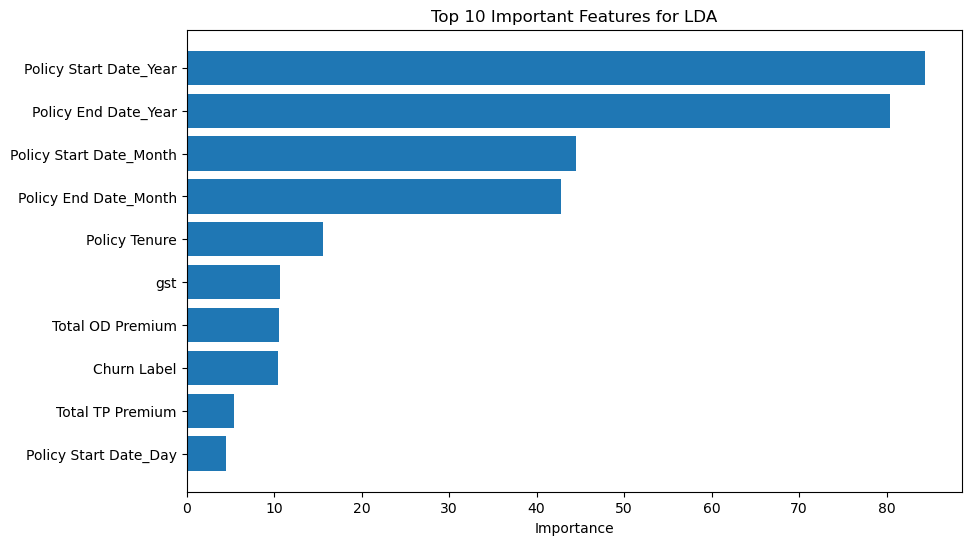

In [3]:
# Calculate the number of classes in the 'Status' column
n_classes = target.nunique()

# Calculate the number of features in the scaled dataset
n_features = data_scaled.shape[1]

# Determine the maximum number of components for LDA
n_components = min(n_classes - 1, n_features)

# Apply LDA with the calculated number of components
lda = LDA(n_components=n_components)
principal_components = lda.fit_transform(data_scaled, target)  # LDA requires both features and target

# Convert the LDA result back into a DataFrame for further analysis
lda_df = pd.DataFrame(data=principal_components, columns=[f'LD{i}' for i in range(1, n_components + 1)])

# Optionally save the LDA result to CSV for further analysis
lda_df.to_csv('lda_result_reduced select.csv', index=False)

# Display the first few rows of the LDA-transformed data
print(lda_df.head())

# Get the feature names and LDA coefficients
feature_names = data_numeric_filled.drop('Policy Status', axis=1, errors='ignore').columns
lda_coefficients = lda.coef_

# Compute feature importance based on the LDA coefficients
import numpy as np
abs_coefficients = np.abs(lda_coefficients).sum(axis=0)
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': abs_coefficients})

# Sort by importance
sorted_feature_importance = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the most important features
print("Top Features by Importance:")
print(sorted_feature_importance.head(10))  # Display top 10 features

# Optionally, save the sorted feature importance to CSV
sorted_feature_importance.to_csv('lda_feature_importance select.csv', index=False)

# Optional: Visualize the top 10 most important features
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_importance['Feature'].head(10), sorted_feature_importance['Importance'].head(10))
plt.xlabel('Importance')
plt.title('Top 10 Important Features for LDA')
plt.gca().invert_yaxis()
plt.show()